In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import datasets
from sklearn import model_selection
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
import cv2

# Load The image

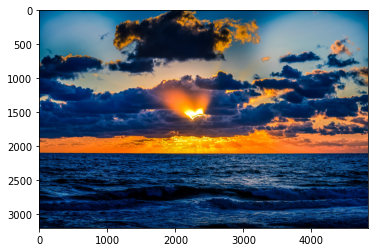

In [2]:
img = plt.imread('images/photo1.jpg')
plt.imshow(img)
cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
plt.show()

In [3]:
actual_shape = img.shape

print(actual_shape)

(3198, 4829, 3)


# Flatten the array

In [4]:
all_pixels = img.reshape((3198 * 4829 , 3))
print(all_pixels.shape)

(15443142, 3)


In [5]:
dominant_colors = 4
km = KMeans(n_clusters= dominant_colors)
km.fit(all_pixels)
centers = km.cluster_centers_
print(centers)

[[142.23523407 159.7707856  167.80349566]
 [  6.85200598  26.58579237  59.91344005]
 [224.18976624 130.3186043   42.41696867]
 [ 32.15383519  81.4280858  126.6919954 ]]


In [6]:
print(km.labels_)

[3 3 3 ... 1 1 1]


In [7]:
centers = np.array(centers , dtype = 'uint8')
print(centers)

[[142 159 167]
 [  6  26  59]
 [224 130  42]
 [ 32  81 126]]


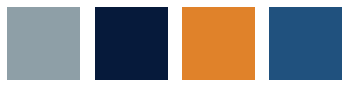

In [8]:
i = 1
colors = []
plt.figure(figsize = (6, 6))
for each_color in centers:
    plt.subplot(1 , 4, i)
    plt.axis('off')
    i += 1
    colors.append(each_color)
    
    a = np.zeros((100 , 100 , 3) ,dtype = 'uint8')
    a[: , : , : ] = each_color
    plt.imshow(a)
    

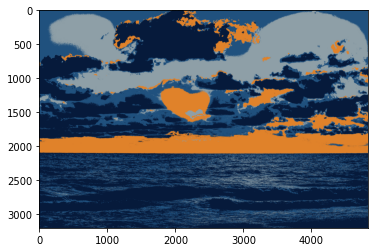

In [9]:
new_img = np.zeros((15443142 , 3) , dtype = 'uint8')

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]

new_img = new_img.reshape(actual_shape)
plt.imshow(new_img)